In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

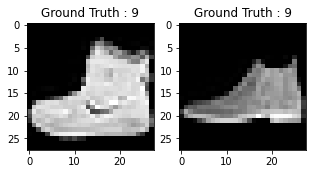

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [8]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [17]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [34]:
from keras.layers import BatchNormalization

In [15]:
batch_size = 64
epochs = 20
num_classes = 10


In [18]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [28]:
from tensorflow.keras.optimizers import Adam

In [31]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.0002, beta_1=0.5),metrics=['accuracy'])

In [35]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [36]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 139s 183ms/step - loss: 0.6270 - accuracy: 0.7766 - val_loss: 0.4417 - val_accuracy: 0.8418
Epoch 2/20
750/750 [==============================] - 58s 77ms/step - loss: 0.3835 - accuracy: 0.8615 - val_loss: 0.3597 - val_accuracy: 0.8715
Epoch 3/20
750/750 [==============================] - 13s 18ms/step - loss: 0.3334 - accuracy: 0.8796 - val_loss: 0.3242 - val_accuracy: 0.8838
Epoch 4/20
750/750 [==============================] - 16s 22ms/step - loss: 0.3022 - accuracy: 0.8907 - val_loss: 0.3031 - val_accuracy: 0.8907
Epoch 5/20
750/750 [==============================] - 14s 18ms/step - loss: 0.2816 - accuracy: 0.8971 - val_loss: 0.2972 - val_accuracy: 0.8887
Epoch 6/20
750/750 [==============================] - 26s 35ms/step - loss: 0.2621 - accuracy: 0.9042 - val_loss: 0.2978 - val_accuracy: 0.8931
Epoch 7/20
750/750 [==============================] - 19s 25ms/step - loss: 0.2487 - accuracy: 0.9096 - val_loss: 0.2891 - val_accurac

In [37]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

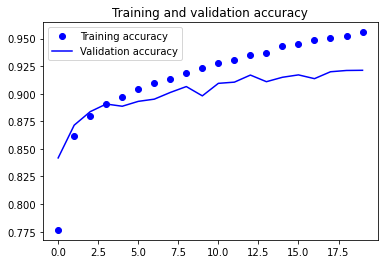

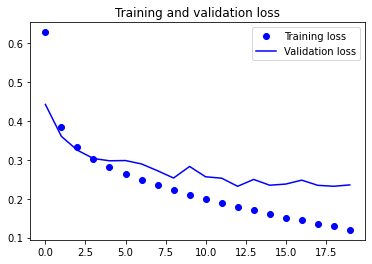

In [42]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
batch_size = 64
epochs = 20
num_classes = 10

In [44]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [45]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [46]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.0002, beta_1=0.5),metrics=['accuracy'])


In [47]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 14s 18ms/step - loss: 0.8413 - accuracy: 0.6873 - val_loss: 0.5446 - val_accuracy: 0.7968
Epoch 2/20
750/750 [==============================] - 14s 19ms/step - loss: 0.5377 - accuracy: 0.7987 - val_loss: 0.4488 - val_accuracy: 0.8407
Epoch 3/20
750/750 [==============================] - 15s 21ms/step - loss: 0.4640 - accuracy: 0.8293 - val_loss: 0.3926 - val_accuracy: 0.8585
Epoch 4/20
750/750 [==============================] - 22s 29ms/step - loss: 0.4228 - accuracy: 0.8463 - val_loss: 0.3620 - val_accuracy: 0.8683
Epoch 5/20
750/750 [==============================] - 58s 77ms/step - loss: 0.3871 - accuracy: 0.8587 - val_loss: 0.3414 - val_accuracy: 0.8763
Epoch 6/20
750/750 [==============================] - 52s 69ms/step - loss: 0.3677 - accuracy: 0.8651 - val_loss: 0.3216 - val_accuracy: 0.8826
Epoch 7/20
750/750 [==============================] - 30s 40ms/step - loss: 0.3492 - accuracy: 0.8720 - val_loss: 0.3078 - val_accuracy:

In [48]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [49]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.2410 - accuracy: 0.9099


In [50]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.24103422462940216
Test accuracy: 0.9099000096321106


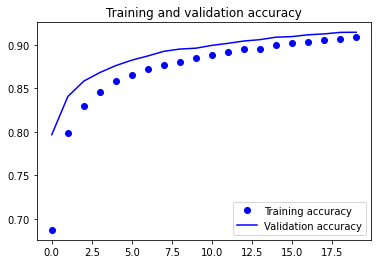

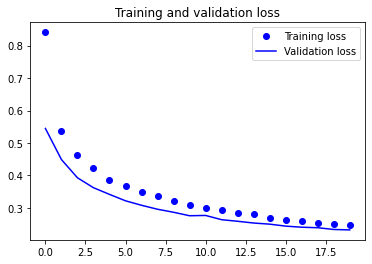

In [51]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [52]:
predicted_classes = fashion_model.predict(test_X)

In [53]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [54]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9031 correct labels


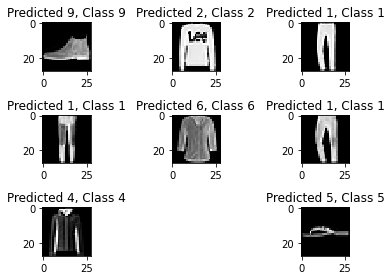

In [56]:
correct = np.where(predicted_classes==test_Y)[0]
print( "Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 969 incorrect labels


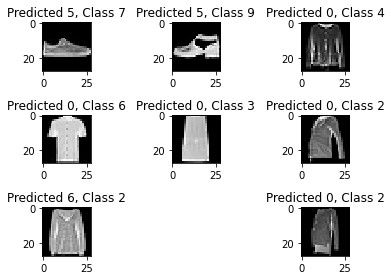

In [57]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [58]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.71      0.91      0.80      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.88      0.86      0.87      1000
     Class 3       0.93      0.88      0.90      1000
     Class 4       0.86      0.86      0.86      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.67      0.73      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



refrence:
https://www.datacamp.com/tutorial/convolutional-neural-networks-python